# 02-Structural Modeling

## 02-01 Definition and Usage


### PartDefinitionAndUsage.sysml
part: modular unit of structure. system, system component, external entity, etc.
- hierarchy to allow for different levels of abstraction
- parts can be logical abstractions, such as orgs, or users
- connect to product reqs

definition > usage - typical method of SysML

In [ ]:
package PartDefinitionAndUsage {
    // Define Part: TitleCase, square corners
        //part def <shortname> Name
            //Shortname is optional, often used as human readable id or to shorten long part names.
    part def <P001> Oven;

    // Usage: camelCase, rounded corners
        // part usageName: PartName;
            // testOven is usage of part def Oven
    part testOven: Oven;
        // part usageName defined by PartName;
    part testOven2 defined by Oven;
        // part usageName defined by shortname; or part usageName: shortname
    part testOven3: P001;
}

Package PartDefinitionAndUsage (c46e0d04-04e9-4965-86e9-6a871d037fc5)


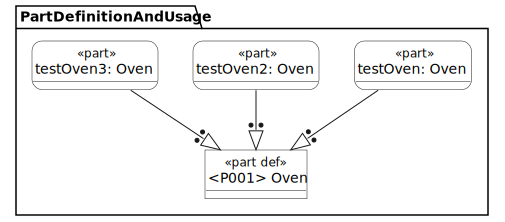

In [ ]:
%viz --view=DEFAULT PartDefinitionAndUsage

Arrow with 2 dots indicates definition. Interpreted as usageName defined by PartName
- Aka, feature typing relationship

SysML has a variety of views based on the relationships between components. This is using a general view
- General view: structural components and relationships
- Interconnection view: connection between parts so that they can interact with each other
- Action flow view
- State transition view
- Geometery view (not covered in this course)
- Case view
- Grid view (not covered in this course)
- Browser view (not covered in this course)
We can get information about what options we specifically have available with `%help %viz`

In [11]:
%help %viz

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

## 02-02 Attributes and multiplicities


### Defining Attributes.sysml
Attribute
- A set of data values that represent the properties of an element
- Most attributes require importing certain packages or libraries.

Integer and PowerUnit are not native to SysML and must be called from packages in the sysml.library using `import`
- private import LibraryPackage::DataTypeFromLibraryPackage
- specifies namespaces w/in SysML

In [ ]:
package DefiningAttributes {
    private import ScalarValues::Integer;	// ScalarValues: std scalar data types (real, integer, bool, string, etc)
    private import SI::PowerUnit;	// SI library: measurement units per ISO 80,000 Std

    part def Oven {
        attribute rackCount: Integer;
        attribute wattage: PowerUnit;
    }

    part testOven: Oven;
}

Package DefiningAttributes (4ce39478-c62e-4f05-802e-f730fa874f69)


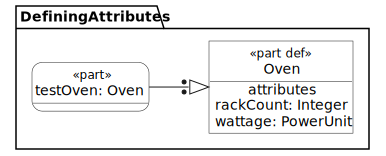

In [20]:
%viz --view=DEFAULT --style=LR DefiningAttributes

### MoreParts.sysml
Feature-member relationship: X is composed of Y
- Black-diamond head
    - Racks are features of the oven

In [ ]:
package MoreParts {
    private import ScalarValues::Integer;
    private import SI::PowerUnit;

    part def Oven {
        attribute rackCount: Integer;
        attribute wattage: PowerUnit;
    }

    // Adding 2 lower and upper racks.
    part def Rack;

    part testOven: Oven{
        part lowerRack: Rack;
        part upperRack: Rack;
    }
        
    // Can also create part usages without definitions.
        // Bad habit to get into. Loses reuse and standardization across multiple parts
    part testOven2 {
        part lowerRack2;
        part upperRack2;
    }
}

Package MoreParts (68f71d63-7b88-49f8-bc87-8a9289a7d83a)


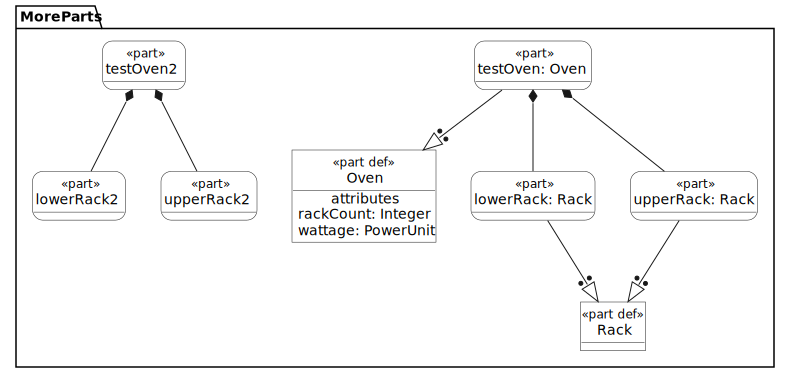

In [ ]:
%viz --view=default MoreParts

### ArrayOfParts.sysml

In [1]:
package ArrayOfParts{
    private import SI::PowerUnit;
    private import ScalarValues::Integer;

    part def Oven{
        attribute wattage: PowerUnit;
        attribute rackCount: Integer;
    }

    part def Rack;

    // define parts as array of usages within same part definition
    part testOven: Oven{
        part racks[2]: Rack;	// Array of racks, with number of array, 2
    }
}

Package ArrayOfParts (e799f7eb-e4d1-46e7-b6ee-f80189fa4fa9)


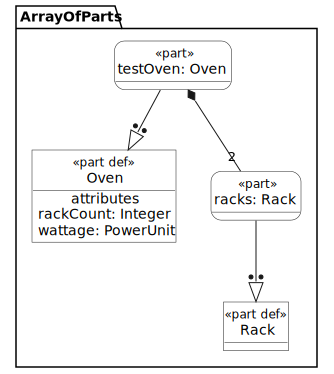

In [2]:
%viz --view=default ArrayOfParts

### Multiplicity.sysml
Multiplicity or Cardinality
- Allowed number of values a usage may have for any instance
    - Single number: fixed value
	- Lower-Upper bounds: natural number

In [3]:
package Multiplicity{
    part def Oven;
    part def Rack;
        
    part oven1: Oven{
        part racks[2]: Rack;	// number of racks is fixed
    }

    part oven2: Oven{
        part racks[1..3]: Rack;	// number of racks can vary between 1-3 racks
    }
}

Package Multiplicity (965f5eda-e549-480a-bbf5-ab5aa071c65b)


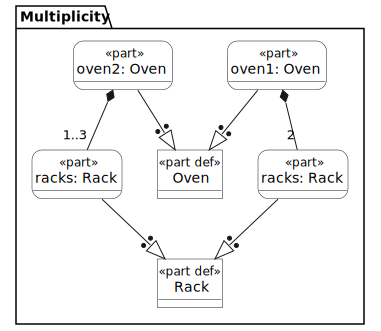

In [4]:
%viz --view=default Multiplicity

## 02-03 Usage & Memberships


### CompositeUsage.sysml
The oven examples above have been examples of **Composite Usage**.
- Models parts that are integral to structure of containing part
- Composite Usage denoted via black diamond

In [6]:
package CompositeUsage{
    private import SI::PowerUnit;
    private import ScalarValues::Integer;

    part def Oven {
        attribute wattage: PowerUnit;
        attribute rackCount: Integer;
    }

    part def Rack;

    part testOven: Oven {
        part racks[2]: Rack;    // Element defined as "racks" are integral to the part test oven
    }
}

Package CompositeUsage (9b314b0f-29e8-4cab-a506-cdad3b656bfc)


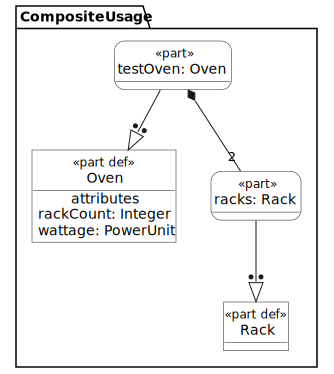

In [7]:
%viz --view=default CompositeUsage

### ReferenceUsage.sysml
Reference Usage
- Usage in which an instance refers to another instance
- NON-COMPOSITIONAL USAGE
    - Refers to a part but is not a component of it.
- Open diamond head

In [8]:
package ReferenceUsage{
    part def Oven;
    part def Building;

    part testOven: Oven{
        ref building: Building; // ref is technically an optional keyword but just include it for clarity
    }
}

Package ReferenceUsage (d314a4c1-bf28-4e1d-93e0-7f9d0b21a17d)


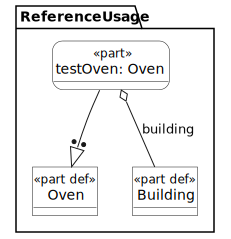

In [9]:
%viz --view=default ReferenceUsage

### OwnedMembership.sysml
Owned Membership
- A part is owned by another part
    - Part is defined within another part definition
    - Part can only be accessed via the part that owns it
        - If you want to use Y in model, you have to use X to access it
- Owner has Circle with cross connecting

In [10]:
package OwnedMembership{
    private import SI::PowerUnit;
    private import ScalarValues::Integer;

    part def Oven {
        attribute wattage: PowerUnit;
        attribute rackCount: Integer;

        part def Rack;  // This time, we are defining the rack as belonging to the Oven
    }

    part testOven: Oven{
        part racks[2]: Rack;
    }
}

Package OwnedMembership (48960063-f505-470d-9c34-08da16b817a8)


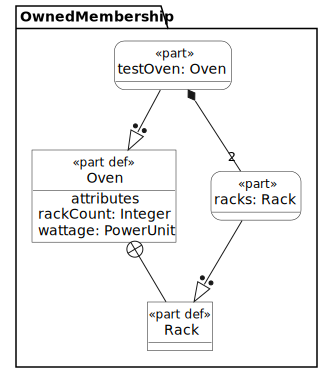

In [11]:
%viz --view=default OwnedMembership

## 02-04 Namespaces and packages


### Namespace.sysml
Namespace
- Element that can contain other elements and provide names for them

Fully Qualified Name
- Listing name. `[Owner Part]::[Part You're Actually Calling]`
- Part is then noted via composite notation (black diamond)

In [ ]:
package Namespace{
    part def Oven{
        part def Rack;
    }

    part def Drawer{
        // we have another rack that could be used in the oven
        // however, it is not stored in the oven, but rather in a separate drawer
        // to call upon the rack, we have to call it's fully qualified name
        part extraRack: Oven::Rack;
    }
}

Package Namespace (3b73e6a1-5cc8-48f4-986e-36f0f4bf0815)


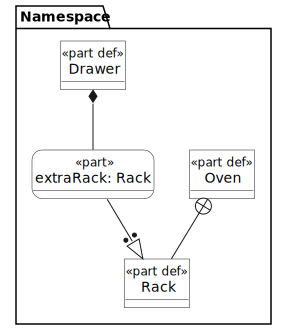

In [13]:
%viz --view=default Namespace

### FeaturesAndFeatureChain.sysml

Parts are often defined with usage nested within other part definitions

Features
- Usages nested in a definition
- Reference features using dot notation

Feature chain: sequence of 2+ qualified names in dot notation
- Each qualified name in a feature chain resolves to a usage

In [18]:
package FeaturesAndFeatureChain{
    private import SI::*;

    part def HeatingElement {
        attribute temperature: TemperatureDifferenceUnit;    // Value Feature
    }

    part def Oven{
        part heatingElement: HeatingElement;    // Part feature 
    }

    // To demo the use of features, use a script to model an action
    action def setupTest{
    in testOven: Oven;
    assign testOven.heatingElement.temperature := 500 [K];   // This is when you finally get to assign actual numbers to things
    }
}

Package FeaturesAndFeatureChain (4038c474-e9d0-4bc6-92a4-ca97282649c2)


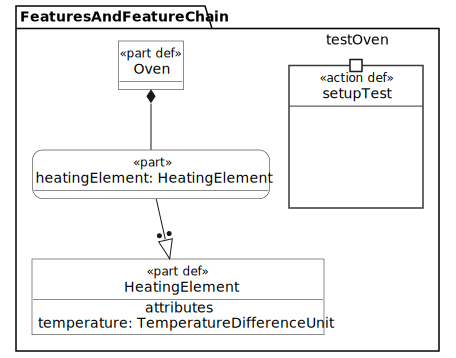

In [20]:
%viz --view=default FeaturesAndFeatureChain

### AllCombined.sysml
We have definitions for rack, drawer and heating element.
This is followed by defining over with the usages of rack, drawer and heating element

In [3]:
package AllCombined{
    private import SI::PowerUnit;
    private import SI::TemperatureDifferenceUnit;
    private import ScalarValues::Integer;

    part def Rack;
    part def Drawer{ part extraRack: Rack; }
    part def HeatingElement{ attribute temperature: SI::TemperatureDifferenceUnit; }

    part def Oven{
        attribute wattage: PowerUnit;
        attribute slotCount: Integer;
        part rack: Rack;
        part drawer: Drawer;
        part heatingElement: HeatingElement; 
    }

    part testOven: Oven;
}

Package AllCombined (d9ec29d1-b958-4dc2-ab95-9123f0f1b4f4)


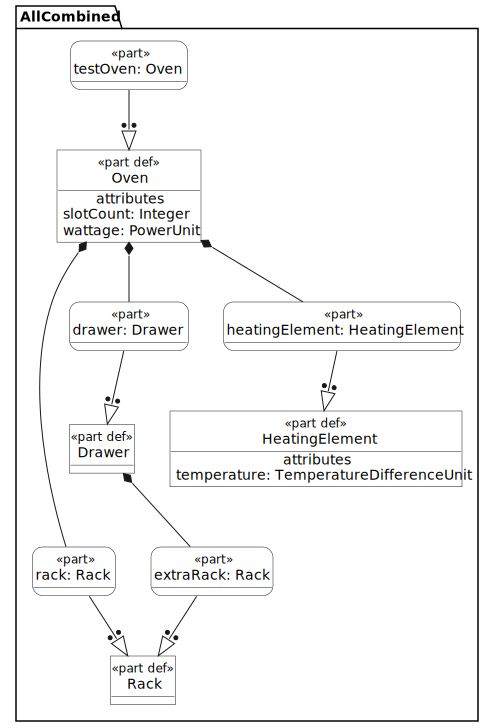

In [4]:
%viz --view=default AllCombined

Mixture of usage and definition is difficult to parse. 

Recommended to move definitions into a separate package from the usages and refer to them within the model.

### Package.sysml
Package
- Namespace used as a container for other elements to organize the model
- Package contents are contained within curly braces
- Visually, package is denoted as a folder with a name at the top and elements within

In [5]:
package Package{
    private import SI::*;
    private import ScalarValues::Integer;

    package OvenDefs{
        part def Rack;
        part def Drawer{
            part extraRack: Rack;
        }
        part def HeatingElement{
            attribute temperature: TemperatureDifferenceUnit;
        }
        part def Oven{
            attribute wattage: PowerUnit;
            attribute slotCount: Integer;
            part rack: Rack;
            part drawer: Drawer;
            part heatingElement: HeatingElement;
        }
    }
}

Package Package (4c4d216a-b67a-427f-8223-32deb3fe4ad7)


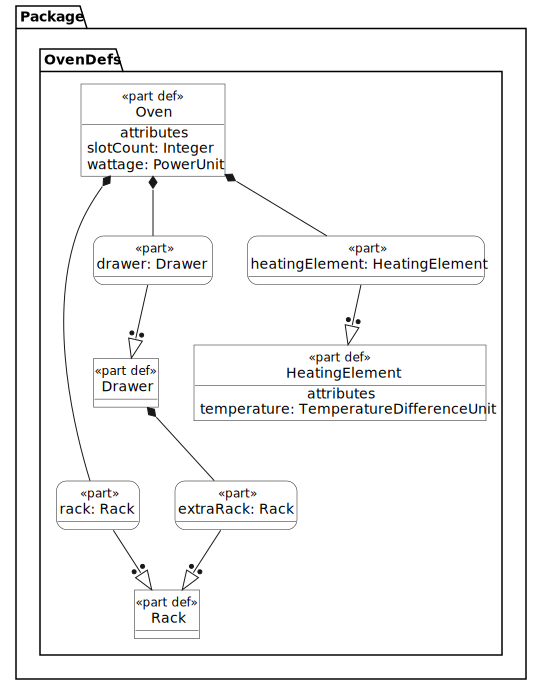

In [6]:
%viz --view=default Package

### ImportRelationship.sysml
Packages can be referred to in another model by importing the package
- Namespace imports memberships from another namespace
- NOTE: For jupyter, you will need to use double-colon notation `::` to import packages within a package as all code has to be packaged to visualize

In [11]:
package ImportRelationship{
    private import Package::OvenDefs::*;
    // * is wildcard, imports all members of package

    part testOven: Oven{
        part racks[2]: Rack;
    }
}

Package ImportRelationship (52760b2b-f828-48e4-9e53-3c2399ddb4af)


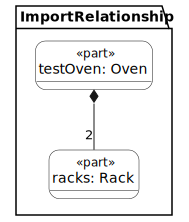

In [12]:
%viz --view=default ImportRelationship
// This will only show the part usages, not definitions

## 02-05 Specializations
Specialization
- Relationship between definition and usage elements enabling reuse

Types of Specialization
| Type | Definition | Example |
|:--------:|:--------|:---------|
| Definition | An element usage is defined by an element definition | testOven is defined by Oven |
| Subclassification | **Definition element** is specialized by another definition element | Oven is specialized as electric or gas |
| Subsetting | **Usage element** is specialized using another usage with a subset of values | Oven with racks is specialized by an electric oven with a subset of properties specific to the rack definied in the oven |
| Redefinition | **Usage** redefines a usage |  |

### Subclassification.sysml
- Can use `part def PartName specializes Part`
or
- `part def PartName :> Part` (Smiley symbol)

Graphically, depicted via 2 open arrow heads pointing from the specific to the generalized type
- Specialized elements inherit features from general ones
    - Can add adtl or change existing features

In [13]:
package Subclassification{
    part def Oven;  // Define an oven
    part def ElectricOven specializes Oven; // define an electric oven as a specialization of Oven
    part def GasOven :> Oven;
}

Package Subclassification (a585b104-694a-49eb-8179-b3311bdc0062)


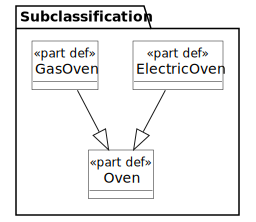

In [14]:
%viz --view=default Subclassification

### Subsetting.sysml
Relationship between 2 usage elements
- One element subsets features of another usage 
- Use keyword `subsets` or `:>` from before
- Arrows from top and bottom rack have hollow heads, connecting them to Rack, and are denoted as inherent to the Oven
    - Same as for specialization, just between usages

In [15]:
package Subsetting{
    part def Rack{
        attribute depth;
        attribute width;
    }

    part def Oven{
        part racks: Rack[2]; // Array of 2 racks
        part topRack subsets racks; // subset racks to make top and bottom
        part bottomRack :> racks;
    }
}

Package Subsetting (1e9c08e9-7fd7-4ad2-beb3-c77ab947581b)


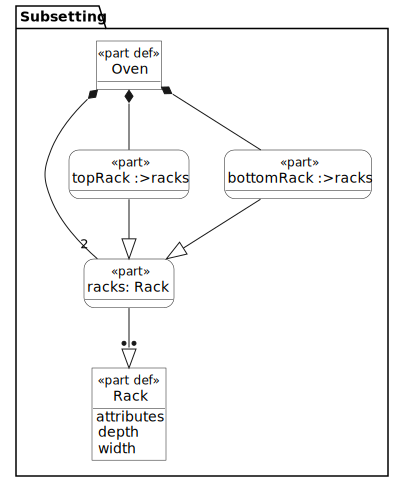

In [16]:
%viz --view=default Subsetting

### Redefinition-1.sysml
Assume we have an item definition that will be referenced by a part definition.
- Specialization redefines item definition
- Uses notation `redefines` or `:>>` (Sergeant symbol)
- Graphically, hollow arrowhead with line crossing arrow path
    - Determines that any specialization will have a respective item definition, takes it from generic to specific

In [17]:
package Redefinition1{
    item def Fuel;
    
    part def Oven{
        ref item fuel: Fuel;
    }

    part def ElectricOven specializes Oven{
        ref item electricity redefines fuel;
    }

    part def GasOven :> Oven{
        ref item gas :>> fuel;
    }
}

Package Redefinition1 (cab2c68b-e1a3-423c-af93-7dae15f7c94b)


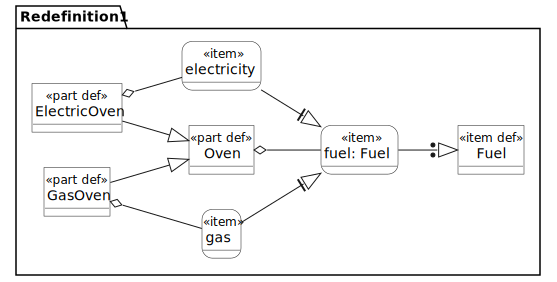

In [19]:
%viz --view=default --style=LR Redefinition1

### Redefinition-2.sysml
Define item with an attribute unitOfMeasure, attribute type Base::Anything.
- Mem. `::` symbolizes namespaces
    - unitOfMeasure is type Anything defined in package named Base
        - Base is a library package.
        - Anything is highest level of abstraction in base package

Visually, redefinition has the hollow lined arrows. Attribute redefinition is defined within the list of attributes as a redefinition of the unitOfMeasure

In [20]:
package Redefinition2{
    item def Fuel { attribute unitOfMeasure: Base::Anything; }
    part def Oven { ref item fuel: Fuel; }
    
    part def ElectricOven specializes Oven{
        ref item electricity redefines fuel{
            attribute electricUnit :>> unitOfMeasure: SI::PowerUnit;
        }
    }

    part def GasOven :> Oven{
        ref item gas :>> fuel{
            attribute gasUnit :>> unitOfMeasure: SI::VolumeUnit;
        }
    }
}

Package Redefinition2 (85ba9851-84e5-4281-8ee7-5e0e072fbab2)


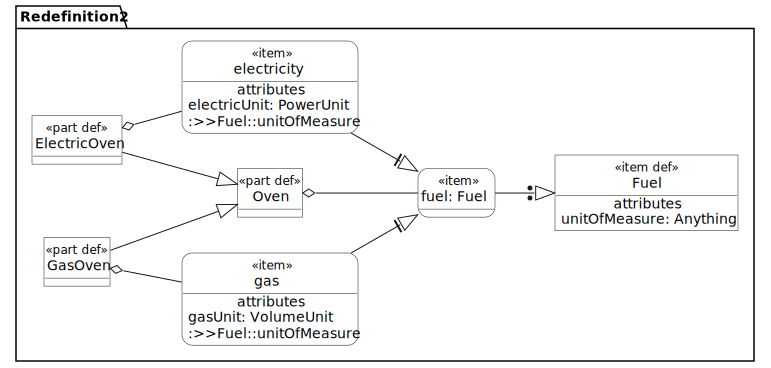

In [22]:
%viz --view=default --style=LR Redefinition2